In [1]:
#intro to computer vision:
#consists of binary classification, multiclass classificaiton, object detection(where a car appears in a video frame), panopic segmentation
#(figuring out where different objects can be separated in an image)
""" 
Worlflow:
1:get data into tensors: torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.Dataloader
2: loss function (torchvision.models) and optimizer torch.optim
3:build training loop
4: fit model to data and make predictions
5: use torchmetrics to evaluate the model
6: use torch.utils.tensorboard to improve the model
7:torch.load and torch.save to save and load the model
"""

""" 
important libraries to know:

torchvision: contains datasets, model architectures, and image transformations used in computer vision problems

torchvision.datasets: contains example datasets for different computer vision problems like object detect and classification(also has base class for 
custom datasets)

torchvision.models: contains common computer vision model architectures implimented in pytorch

torchvision.transforms:usually, images need to be transformed before working with a model, and here are some common ones

torch.utils.data.Dataset: base dataset class for pytorch

torch.utils.data.DataLoader: creates a python iterable over a Dataset, created with torch.utils.data.Dataset




"""



' \nimportant libraries to know:\n\ntorchvision: contains datasets, model architectures, and image transformations used in computer vision problems\n\ntorchvision.datasets: contains example datasets for different computer vision problems like object detect and classification(also has base class for \ncustom datasets)\n\ntorchvision.models: contains common computer vision model architectures implimented in pytorch\n\ntorchvision.transforms:usually, images need to be transformed before working with a model, and here are some common ones\n\ntorch.utils.data.Dataset: base dataset class for pytorch\n\ntorch.utils.data.DataLoader: creates a python iterable over a Dataset, created with torch.utils.data.Dataset\n\n\n\n\n'

In [2]:
#import dependencies:
import torch
from torch import nn

import torchvision
from torchvision import datasets 
from torchvision.transforms import ToTensor 

import matplotlib.pyplot as plt

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"


In [3]:
#first, we need to get our dataset ready:
#root is path to download, train is train/test splot, download is whether ot download or not
#transform is how to transform the images into tensors, and target_transform is how you would like to transofrm the targets (labels) of the data
train_data = torchvision.datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform=None)
#train false means it gives you test data
test_data = torchvision.datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor(),target_transform=None)



In [4]:
#lets inspect the data

image,label = train_data[0]
image,label #NOTE: these are not torch tensors, so .shape wont work

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
#lets see what it looks like
image.shape #this has shape (1,28,28), meaning that the total train_data is of shape (batch_size,1,28,28) 
#OR BASICALLY: BATCH_SIZE=32, COLOR_CHANNELS:1, WIDTH=28, HEIGHT=28 or CHW for short(REMEMBER THE NAME) (there is also NCHW and NHWC)
#PYTORCH SAYS THAT NHWC is best practice, but since we using small model it doesn't matter

len(train_data.data),len(train_data.targets),len(test_data.data), len(test_data.targets) #len finds the total number of elements in each

#to find the class attributes of the data, use the .classes
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image Shape: torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

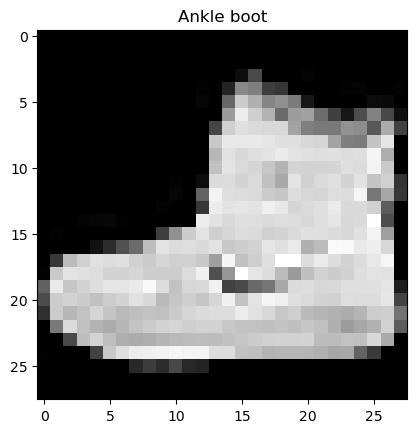

In [6]:
#Next, lets visualize the data:
import matplotlib.pyplot as plt
image,label = train_data[0]
print(f"Image Shape: {image.shape}")
plt.imshow(image.squeeze(),cmap="gray") #turns it from 1,28,28 to 28,28, cmap is for the color of it
plt.title(class_names[label]) #label is a number, also an index in the classnames object we made earlier




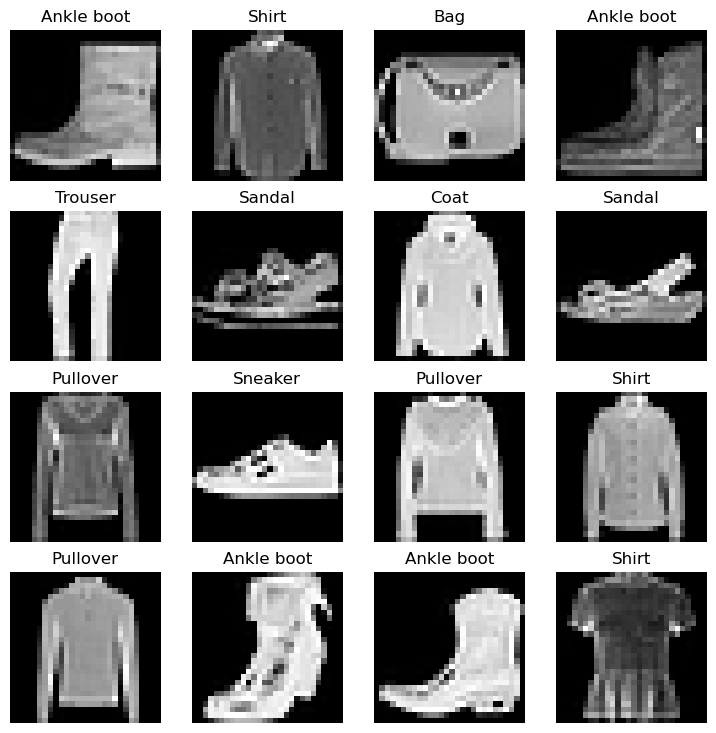

In [7]:
#lets plot a few more of these:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4# number of images to make

#now, lets plot it so it shows random images
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_data),size=[1]).item() #just generates a random number from 0 to lenth of train data to serve as teh index
    image,label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)






In [8]:
#Now, the dataloader: it helps load data for training and inference into the model: torch.utils.data.DataLoader
#turns large dataset into a python iterable of smaller chunks, set by batch_size parameter, tur
#this way, gradient descent is preformed more often per epoch, which gives model more chances to improve
from torch.utils.data import DataLoader

BATCH_SIZE = 32

#ensures to shuffle the data every epoch
train_dataloader = DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False) #dont have to shuffle test data.

print(f"Dataloader of {train_dataloader,test_dataloader}")
print(f"Size of dataloaders is {len(train_dataloader)} and {len(test_dataloader)} with batches of size {BATCH_SIZE}")



Dataloader of (<torch.utils.data.dataloader.DataLoader object at 0x3220caa80>, <torch.utils.data.dataloader.DataLoader object at 0x32217e210>)
Size of dataloaders is 1875 and 313 with batches of size 32


In [9]:
#see whats inside of each batch:

train_features_batch,train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape,train_labels_batch.shape # now, it really is in the form NCHW

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size is still torch.Size([28, 28])


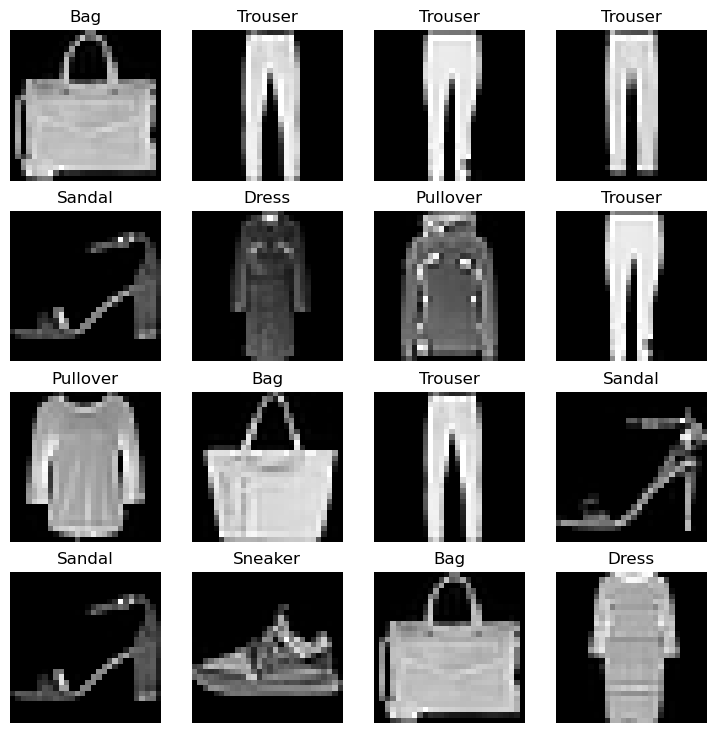

In [10]:
#now, use code similar to what you did earlier to display a single image from the features batch:

print(f"Image size is still {train_features_batch[0].squeeze().shape}")

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
    image,label = train_features_batch[random_idx],train_labels_batch[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)



In [11]:
#how does flatten work:
from torch import nn
flatten_model = nn.Flatten()

X = train_features_batch[0] #should return of type (1,28,28)
output = flatten_model(X)

print(f"The size of the input was: {X.shape}")
print(f"The size of the output was: {output.shape}")

#WHY DO THIS: because linear layers like their data to be in the form of one long feature vector size (1,784)


The size of the input was: torch.Size([1, 28, 28])
The size of the output was: torch.Size([1, 784])


In [12]:
#make a baseline model

class BaselineModel(nn.Module):
    def __init__(self,input_shape: int,output_shape: int,hidden_neurons: int):
        super().__init__()
        self.sequence_chain = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,out_features=hidden_neurons),
            nn.Linear(in_features=hidden_neurons,out_features=output_shape)
        )
    def forward(self,x: torch.Tensor) -> torch.Tensor:
        return self.sequence_chain(x)

model_2 = BaselineModel(input_shape=train_features_batch[0].numel(),output_shape=len(class_names),hidden_neurons=10).to("cpu")
#NOTE: len returns the number of elements in teh first layer of a tensor, use numel() for the number of elements
model_2.state_dict()['sequence_chain.1.weight'][0].numel()
model_2

BaselineModel(
  (sequence_chain): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [13]:
#For metrics, like accuracy, rewrite the script to pull it from the helper_functions.py file, but in the end
#just use the torchmetrics
from pathlib import Path 
import requests 

if Path("helper_functions.py").is_file():
    print(f"Already downloaded. Skipping...")
else:
    request = requests.get(url="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open(file="helper_functions.py",mode="wb",newline="") as file:
        file.write(request.content)
from helper_functions import accuracy_fn




Already downloaded. Skipping...


In [14]:
#Now, lets set up the loss function and optimizer:

loss_fn = torch.nn.CrossEntropyLoss() #since this is multi class classification problem
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.1)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] torch.Size([60000, 28, 28]) torch.Size([60000])


(-0.5, 27.5, 27.5, -0.5)

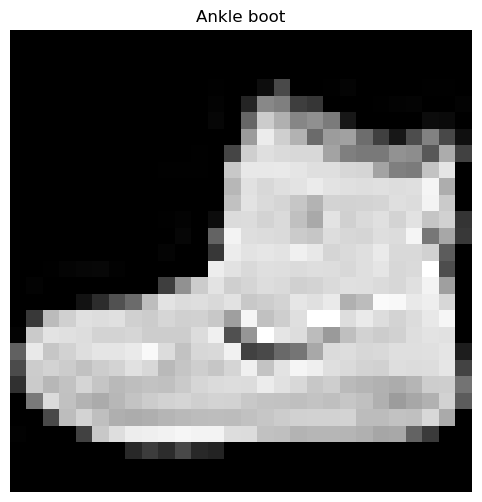

In [15]:
#now, lets practice again the setting up of the dataset to ensure you remember:
#find we will use torchmetrics.dataset to find the fashionNMIST or something, and then torchmetrics.models to find pretraind
#and torchmetrics.transform to turn the images into tensors
from torchvision.transforms import ToTensor

#ERROR LOG: you wrote ToTensor instead of ToTensor, so you were passing the class itself rather than an instance of it
train_data = torchvision.datasets.FashionMNIST(root="data",train=True,download=True,transform=ToTensor(),target_transform=None)
test_data = torchvision.datasets.FashionMNIST(root="data",train=False,download=True,transform=ToTensor(),target_transform=None)

print(train_data.classes,train_data.data.shape, train_data.targets.shape) #returns list, and two tensors
#sizes [10],[60000,28,28],[6000]
class_names = train_data.classes

#Now, lets look at the data using matplotlib:
image,label = train_data[0] #remember, indexing on a torch dataset returns the image and its label (two vectors)
#dataset is of type NCHW, so indexing this way just returns type 1,28,28 for 

plt.figure(figsize=(10,6))
plt.imshow(image.squeeze(),cmap="gray") #imshow only plots 2d arrays or vectors
plt.title(class_names[label])
plt.axis(False)


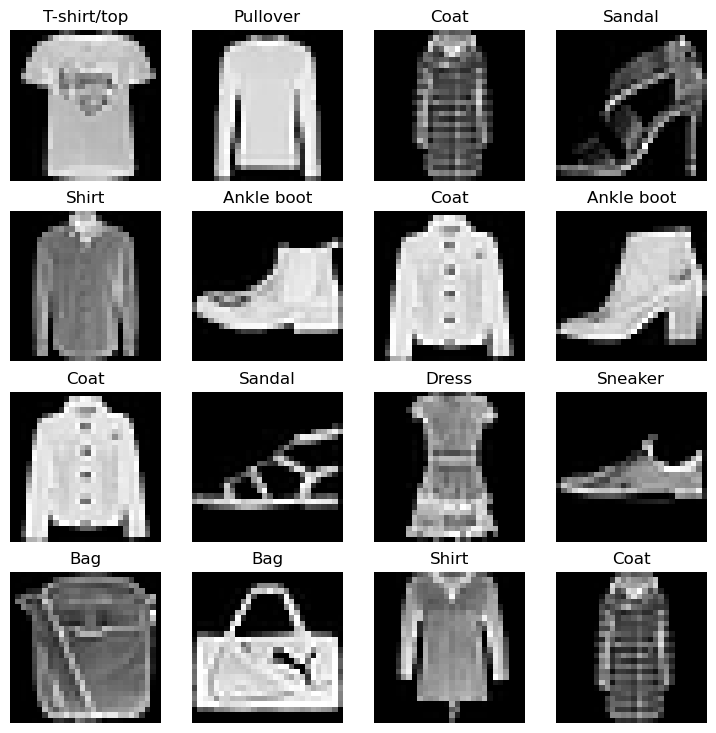

In [16]:
#now, lets try to get the batchloader working, and then print a few of the elements in the batch.
BATCH_SIZE = 32

train_dataloader = torch.utils.data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data,batch_size=BATCH_SIZE,shuffle=False)

#now, lets use the dataloader to load in some images and display them rq:
train_features_batch,train_labels_batch = next(iter(train_dataloader)) #returns a batch of labels and 
train_features_batch.shape,train_labels_batch.data #returns two tensors

#now, lets try displaying the data in a batch, or at least the first 16 elements:

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1,rows*cols+1):
    random_idx = torch.randint(low=0,high=len(train_features_batch),size=[1]).item()
    image,label = train_features_batch[random_idx],train_labels_batch[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(),cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)


In [17]:
#NOW THAT OUR LOSS FUNCTIONS,optimizers, and metrics WERE DEFINED, lets make a function to find the time training takes
#on cpu vs gpu:

from timeit import default_timer as timer 
def print_train_time(start: float, end: float, device: torch.device = None):
    #start = starting time in timeit form, end is ending
    total_time = end - start 
    print(f"The total time to train on {device} is: {total_time:.3f} seconds")
    return total_time



In [18]:
#now, lets set up the training loop for batched data, where our data is contained in the two dataloaders
#Loop through epochs, loop through training batches, loop through training

from tqdm.auto import tqdm 

torch.manual_seed(42)
train_time_on_start = timer() #starts the timer, which is a variable

epochs = 3

#the range, makes a range from 0 to epochs-1
#the tqdm wraps a progress bar in your training(basically it knows the current epoch and the final one, and can make
# a progress bar off of that)
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------")

    train_loss = 0
    #EXPLANATION:
    #the DataLoader object is an iterable, meaning you can use it in a for ... in loop
    #(to be an iterator, must impliment the __iter__ method)
    #examples include: lists, strings, dicts, ranges, and dataloaders
    #(REALLY, THE FOR IN LOOP IS JUST: next(iter(obj)) untill next() returns None

    # it RETURNS an iterator when you do iter(DataLoader)
    #every loop gives you (X,y) a batch tensor or features and targets
    #NOTE: the iterable decays to an iterator when looped, or when casted with iter() and next()
    #now, enumerate, just means adding indexes to an iterator.
    # so an inumerator is of size (num_batch,Batch_size,2) where the 2 is one index and one (X,Y) pair object
    #where batch is from 0,1,2,...32 and (X,y) are a set of all the batch feature/target pairs in the batch
    for batch, (X,y) in enumerate(train_dataloader):
        #put model in train mode
        model_2.train()

        y_preds = model_2(X) #where X is of size (32,1,28,28) (one batch), but will be flattened to (32,784), returning (32,10)

        loss = loss_fn(y_preds,y) # CHECK, above it appear that the targets are in form [32,10]
        #y is in form [32]

        train_loss += loss #cumulatively add upp the loss per batch 

        #zerograd to prepare for backprop
        optimizer.zero_grad()

        #now, backwards pass through the data:
        loss.backward()

        #now step the optimizer
        optimizer.step()

        #print how many samples we have seen:
        if batch % 400 == 0:
            #remember, len(x) is not numel(), it will reutrn the number of images in a batch, X=(32,1,28,28)
            #also, len(train_dataloader) will return the number of batches, not the number of sampels
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    train_loss /= len(train_dataloader) #divide the loss by the number of batches in the iterable dataloader

    ##testing
    test_loss, test_acc = 0,0
    model_2.eval()
    with torch.inference_mode():
        #here, remember it decays to an iterator in a for loop
        for X,y in test_dataloader:
            #forward pass:
            y_test_preds = model_2(X) #retuns logits of type (num_images,784)

            #calculate the test loss and test acc
            test_loss += loss_fn(y_test_preds,y)
            #find the cumulative test acc
            test_acc += accuracy_fn(y_true=y,y_pred=y_test_preds.argmax(dim=1)) #need it to be in form (num_pics) from
            #(num_pics,10)
            #REMEMBER: it doesnt remove a dimension, but instead returns the index of the largest element in each row, 
            #effectively removing a dimension by replacing the rows with an integer of index

        #REMEMBER: calculations on test metrics must happen inside the inference mode, but after all batches are done:
        #this dividing is just to keep it standardized with the previous average loss per batch formula
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    #now, print what is happening
    print(f"\nTraining Loss: {train_loss:.5f} | Testing Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.3f}\n")

#now calculate the total train time:
train_time_on_end_cpu = timer()
print_train_time(start=train_time_on_start,end=train_time_on_end_cpu,device=str(next(model_2.parameters()).device))
#returns the tensor from the first object and finds its device as a string






         





  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Training Loss: 0.59499 | Testing Loss: 0.50547 | Testing Accuracy: 82.179

Epoch: 1
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Training Loss: 0.47675 | Testing Loss: 0.48438 | Testing Accuracy: 82.857

Epoch: 2
------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Training Loss: 0.45513 | Testing Loss: 0.47734 | Testing Accuracy: 83.556

The total time to train on cpu is: 4.967 seconds


4.967101082991576

In [19]:
#now, lets write a function to evaluate a model. returns a dictionary of model results
#NOTE: a similar thing can be done with the torchmetrics.Metrics object (more on that later)
#ERROR LOG: cannot unpack uniterable int object: loss,acc = 0 wont work bc it will try to iterate on the int
#to see what it returns
from helper_functions import accuracy_fn
torch.manual_seed(42)
def evaluate_model(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
    
    loss,acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X,y in dataloader:
            #fowards pass:
    
            eval_preds = model(X) #passes in (32,1,28,18), returns (32,10)
        
            #evaluate the data:
            loss += loss_fn(eval_preds,y)
            acc += accuracy_fn(y_true=y,y_pred=eval_preds.argmax(dim=1))
        #now, lets divide to find the average per epoch
        loss /= len(dataloader)
        acc /= len(dataloader)

        results_dict = {
            "model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc
        }
        return results_dict

#now, lets try to evaluate our model:
model_2_results = evaluate_model(model=model_2,dataloader=test_dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_2_results



{'model_name': 'BaselineModel',
 'model_loss': 0.47734329104423523,
 'model_acc': 83.55630990415335}

In [20]:
#NOW, lets build anouther model with non-ineariry

class NonLinearModel(nn.Module):
    def __init__(self,input_size,output_size,hidden_neurons):
        super().__init__()
        self.sequencial_chain = nn.Sequential(
            nn.Flatten(), #flattens the tensor from (32,1,28,28) to(32,784)
            nn.Linear(in_features=input_size,out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons,out_features=hidden_neurons),
            nn.ReLU(),
            nn.Linear(in_features=hidden_neurons,out_features=output_size)
        )
    def forward(self,X: torch.Tensor) -> torch.Tensor:
        return self.sequencial_chain(X) 
model_3 = NonLinearModel(input_size=train_features_batch[0].numel(),output_size=len(class_names),hidden_neurons=10).to(device)
model_3

NonLinearModel(
  (sequencial_chain): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
    (5): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
#now, lets set up the loss, optimizer and metrics
from helper_functions import accuracy_fn
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),lr=0.1)

In [22]:
#we will now write functions for the train and test loops to make it more modular.
#also, since it is device agnostic, be sure to call .to(device) on the X and y coming from teh dataloader
#NOTE: cannot move the dataloader to the gpu, but just call the move on the X and y produced by the dataloader

#the testing function will take a model, a dataloader, a loss function, and an evaluation function

def train_step(model: nn.Module, dataloader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module, accuracy_fn, optimizer: torch.optim.Optimizer,device: torch.device=None):
    #this code will be inside of the epoch loop, inside of the writer block

    #put the model in training mode:
    train_loss,train_acc = 0,0
    model.train()
    #remember, the dataloader if of type (60000,1,28,28), and each batch is (32,1,28,28)
    for batch,(X,y) in enumerate(dataloader):
        #first, move the data per batch over
        X,y = (data.to(device) for data in (X,y))
        #next, we do a forward pass on the data
        y_logit_preds = model(X)
        #now, lets turn the prediction from logits to the expected final form:
        y_preds = torch.round(y_logit_preds.argmax(dim=1))
        #now, we will find the loss associated with the current value:
        loss = loss_fn(y_logit_preds.argmax(dim=1),y) #y is of form (32), y_preds is of form (32,10), so remember the argmax
        #also, find the current training accuracy
        acc = accuracy_fn(y_preds,y)
        #then, lets add that calculated loss value to the overall loss value:
        train_loss += loss
        #repeat for the accuracy
        train_acc += acc
        #now, lets zero the grads to prepare for backprop:
        optimizer.zero_grad()
        #now, lets do a backwards pass on the data:
        loss.backward()
        #now, lets adjust the gradients by stepping the optimizer:
        optimizer.step()
    train_loss /= len(dataloader) #where the length is the number of batches
    train_acc /= len(dataloader) #same idea here
    print(f"Train Loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}")
        
def test_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader,loss_fn: torch.nn.Module,accuracy_fn,device: torch.device=None):
    #now, this is exclusively the test steps, so lets start by again moving the data to the
    test_loss,test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X,y in dataloader:
            #again, the X is still (32,1,28,28), just different notation for iterators
            #first, move the data:
            X,y = (data.to(device) for data in (X,y))
            #next, a forward pass on the batch data:
            test_logit_preds = model(X)#passes in type (32,1,28,28), flattened to(32,784) returns (32,10)
            test_preds = torch.round(test_logit_preds.argmax(dim=1))
            #now, find the loss and accuracy values:
            loss = loss_fn(test_logit_preds.argmax(dim=1),y)
            acc = accuracy_fn(y_pred=test_preds,y_true=y)
            #now, just append them to teh total loss and acc:
            test_loss += loss
            test_acc += acc 
        test_loss /= len(dataloader)
        test_acc /= len(dataloader)
        print(f"Testing Loss: {test_loss:.5f} | Testing Accuracy: {test_acc:.2f}")






In [23]:
#now that we have our train and test step functions, we can impliment them in our trainin gand testing loop:
from timeit import default_timer as timer 
from tqdm.auto import tqdm

#first, we set the number of epochs, starting small:
epochs = 3
train_time_on_start_gpu = timer()

#now, we can begin the loop, since the data will be automatically brough to the machine, device agnostically
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    train_step(model=model_3)
    


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------


TypeError: train_step() missing 4 required positional arguments: 'dataloader', 'loss_fn', 'accuracy_fn', and 'optimizer'